# 1. Importar librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import joblib

import sys
sys.path.append('utils/')
import funciones

# 2. Descargar datos

#### Descargar datos usando la API de kaggle

Para que esto funciones debe descargar su propia API key de Kaggle y ubicarla en la carpeta .kaggle que está en SU_UNIDAD_DE_ALMACENAMIENTO/USUARIOS/USUARIO/.

In [3]:
funciones.download_data('luluw8071/brain-tumor-mri-datasets')

Dataset URL: https://www.kaggle.com/datasets/luluw8071/brain-tumor-mri-datasets


# 3. Explorar datos

Imagen de cerebro sin tumor

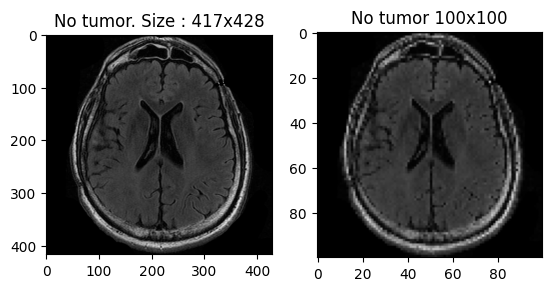

In [4]:
fig, axs = plt.subplots(1, 2)

img1 = cv2.imread('data\\Brain_Tumor_Datasets\\test\\no\\7 no.jpg')
axs[0].imshow(img1)
axs[0].set_title(f'No tumor. Size : {img1.shape[0]}x{img1.shape[1]}')

img1_r = cv2.resize(img1 ,(100,100))
axs[1].imshow(img1_r)
axs[1].set_title('No tumor 100x100')

plt.show()

Imagen de cerebro con tumor

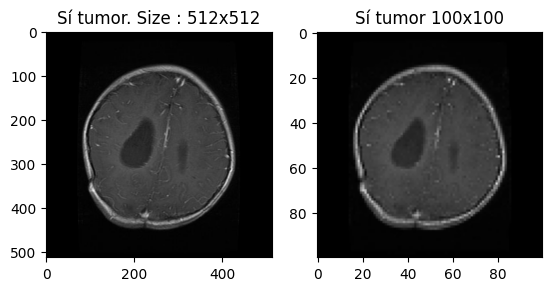

In [5]:
fig, axs = plt.subplots(1, 2)

img1 = cv2.imread('data\\Brain_Tumor_Datasets\\test\\yes\\Te-gl_0018.jpg')
axs[0].imshow(img1)
axs[0].set_title(f'Sí tumor. Size : {img1.shape[0]}x{img1.shape[1]}')

img1_r = cv2.resize(img1 ,(100,100))
axs[1].imshow(img1_r)
axs[1].set_title('Sí tumor 100x100')

plt.show()

Como las imágenes aún se visualizan bien en 100x100, se decide redimensionar todas las imágenes a 100x100.

# 4. Importar datos

In [6]:
x_train, y_train, names_train = funciones.import_data('data/Brain_Tumor_Datasets/train/')
x_test, y_test, names_test = funciones.import_data('data/Brain_Tumor_Datasets/test/')

  0%|          | 0/2869 [00:00<?, ?it/s]

100%|██████████| 1035/1035 [00:08<00:00, 123.71it/s]


In [8]:
print('Dimensiones de x_train:', x_train.shape)
print('Dimensiones de y_train:', y_train.shape)
print('Dimensiones de x_test:', x_test.shape)
print('Dimensiones de y_test:', y_test.shape)

Dimensiones de x_train: (6953, 100, 100, 3)
Dimensiones de y_train: (6953, 1)
Dimensiones de x_test: (1737, 100, 100, 3)
Dimensiones de y_test: (1737, 1)


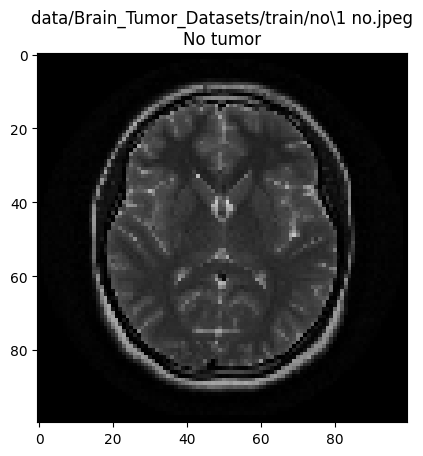

In [9]:
img_prueba = x_train[0]
plt.imshow(img_prueba)
plt.title(str(names_train[0]) + ('\nNo tumor' if y_train[0][0] == 0 else 'Sí tumor'))
print()

# 5. Estandarizar y exportar datos

In [10]:
x_train = np.array(x_train).astype('float32') / 255
x_test = np.array(x_test).astype('float32') / 255

In [11]:
joblib.dump(x_train, "salidas\\x_train.pkl")
joblib.dump(y_train, "salidas\\y_train.pkl")
joblib.dump(x_test, "salidas\\x_test.pkl")
joblib.dump(y_test, "salidas\\y_test.pkl")

['salidas\\y_test.pkl']